In [5]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function 


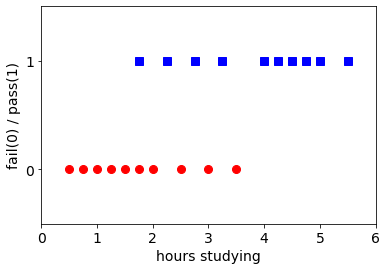

In [17]:
X0 = np.array([.5, .75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5])
y0 = np.zeros_like(X0)

X1 = np.array([1.75, 2.25, 2.75, 3.25, 4, 4.25, 4.5, 4.75, 5, 5.5])
y1 = np.ones_like(X1)

plt.plot(X0, y0, 'ro', markersize=8)
plt.plot(X1, y1, 'bs', markersize=8)

plt.axis([0, 6, -.5, 1.5])
cur_axes = plt.gca()
plt.xlabel('hours studying', fontsize=14)
plt.ylabel('fail(0) / pass(1)', fontsize=14)
cur_axes.axes.get_yaxis().set_ticks([0, 1])
# plt.axes().set_aspect('3')
plt.tick_params(axis='both', which='major', labelsize=14)

# plt.savefig(filename, bbox_inches='tight')
plt.show()


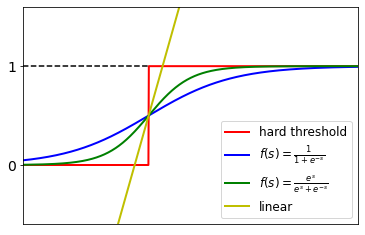

In [18]:
x = np.linspace(-5, 5, 1000)
y1 = (np.sign(x) + 1)/2
y2 = 1./(1 + np.exp(-x))
y3 = np.exp(x) / (np.exp(x) + np.exp(-x))

l1, = plt.plot(x, y1, 'r', linewidth=2, label="hard threshold")
l2, = plt.plot(x, y2, 'b', linewidth=2, label="$f(s) = \\frac{1}{1 + e^{-s}}$")
l3, = plt.plot(x, y3, 'g', linewidth=2,
               label="$f(s) = \\frac{e^{s}}{e^{s} + e^{-s}}$")
l4, = plt.plot([-1, 1], [-1, 2], 'y', linewidth=2, label="linear")
plt.plot([-4, 0], [1, 1], 'k--')

# handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=[l1, l2, l3, l4], fontsize=12)

cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([0, 1])

plt.axis([-3, 5, -.6, 1.6])
# plt.axes().set_aspect('2')
plt.tick_params(labelsize=14)
# plt.savefig('activation.png', bbox_inches='tight', dpi = 300)
# pdf.savefig(bbox_inches='tight')
plt.show()

plt.close("all")


# Ví dụ với dữ liệu 1 chiều

In [42]:
np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extened data
Xbar = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

Các hàm cần thiết cho logistic sigmoid regression

In [36]:
def sigmoid(S):
    """
    S: an numpy array
    return sigmoid function of each element of S
    """
    return 1/(1+np.exp(-S))


def prob(w, X):
    """
    X: a 2d numpy array of shape (N, d). N datatpoint, each with size d
    w: a 1d numpy array of shape (d)
    """
    return sigmoid(X.dot(w))


def loss(w, X, y, lam):
    """
    X, w as in prob 
    y: a 1d numpy array of shape (N). Each elem = 0 or 1 
    """
    a = prob(w, X)
    loss_0 = -np.mean(y*np.log(a) + (1-y)*np.log(1-a))
    weight_decay = 0.5/X.shape[0] * lam * np.sum(w*w)
    return loss_0 + weight_decay


def logistic_regression(w_init, X, y, lam, lr=0.1, nepoches=2000):
    # lam - regularization paramether, lr - learning rate, nepoches - number of epoches
    N, d = X.shape[0], X.shape[1]
    w = w_old = w_init

    # store history of loss in loss_hist
    loss_hist = [loss(w_init, X, y, lam)]
    ep = 0
    while ep < nepoches:
        ep += 1
        mix_ids = np.random.permutation(N)
        for i in mix_ids:
            xi = X[i]
            yi = y[i]
            ai = sigmoid(xi.dot(w))
            # update
            w = w - lr*((ai - yi)*xi + lam*w)
        loss_hist.append(loss(w, X, y, lam))
        if np.linalg.norm(w - w_old)/d < 1e-6:
            break
        w_old = w
    return w, loss_hist

def predict(w, X, threshold=0.5):
    """
    predict output of each row of X
    X: a numpy array of shape
    threshold: a threshold between 0 and 1 
    """
    res = np.zeros(X)
    res[np.where(prob(w, X) > threshold)[0]] = 1
    return res

In [43]:
w_init = np.random.randn(Xbar.shape[1])
lam = 0.0001
w, loss_hist = logistic_regression(w_init, Xbar, y, lam, lr=0.05, nepoches=500)
print('Solution of Logistic Regression:', w)
print('Final loss:', loss(w, Xbar, y, lam))

Solution of Logistic Regression: [ 1.54337021 -4.06486702]
Final loss: 0.40244672497461936


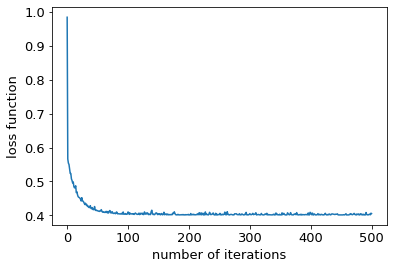

In [38]:
plt.plot(loss_hist)
plt.xlabel('number of iterations', fontsize=13)
plt.ylabel('loss function', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
# plt.savefig(bbox_inches='tight')
plt.show()

sklearn

In [44]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(C = 2/lam)
model.fit(X, y)
w2 = np.array([model.coef_[0][0], model.intercept_[0]])
print(w2)
print(loss(w2, Xbar, y, lam))

[ 1.50461548 -4.07763981]
0.40154115081085046


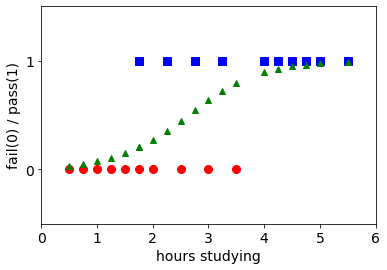

In [47]:
X0 = np.array([.5, .75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 3.5])
y0 = np.zeros_like(X0)

X1 = np.array([1.75, 2.25, 2.75, 3.25, 4, 4.25, 4.5, 4.75, 5, 5.5])
y1 = np.ones_like(X1)

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

plt.axis([0, 6, -.5, 1.5])
cur_axes = plt.gca()
plt.xlabel('hours studying', fontsize = 14)
plt.ylabel('fail(0) / pass(1)', fontsize = 14)
cur_axes.axes.get_yaxis().set_ticks([0, 1])
# plt.axes().set_aspect('equal')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.plot(X.reshape(-1), prob(w, Xbar), 'g^')
# pdf.savefig(bbox_inches='tight')
plt.show()

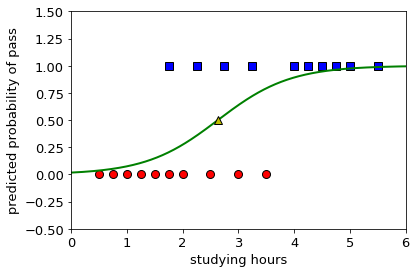

In [49]:
plt.plot(X0, y0, 'ro', markersize=8, markeredgecolor='k')
plt.plot(X1, y1, 'bs', markersize=8, markeredgecolor='k')

xx = np.linspace(0, 6, 1000)
w0 = w[0]
w1 = w[1]
threshold = -w1/w0
yy = sigmoid(w1 + w0*xx)

plt.plot(xx, yy, 'g-', linewidth=2)
plt.plot(threshold, .5, 'y^', markersize=8, markeredgecolor='k')
plt.xlabel('studying hours', fontsize=13)
plt.ylabel('predicted probability of pass', fontsize=13)
plt.axis([0, 6, -.5, 1.5])
plt.tick_params(axis='both', which='major', labelsize=13)
# pdf.savefig(bbox_inches='tight')
plt.show()


# Với dữ liệu 2 chiều

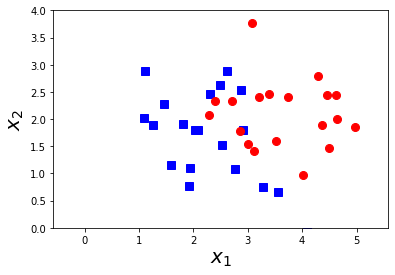

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

# filename = 'logistic_2d.pdf'
# with PdfPages(filename) as pdf:
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize=8, alpha=1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize=8, alpha=1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs
# cur_axes = plt.gca()
# cur_axes.axes.get_xaxis().set_ticks([])
# cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)
# pdf.savefig(bbox_inches='tight')
plt.show()


In [61]:
X = np.concatenate((X0, X1), axis=0)
y = np.concatenate((np.zeros((1, X0.shape[0])), np.ones((1, X1.shape[0]))), axis=1).T

Xbar = np.concatenate((np.ones((2*N, 1)), X), axis=1)

d = Xbar.shape[1]
w_init = np.random.randn(d)
w, losst_hist = logistic_regression(w_init, Xbar, y, lam, lr=0.05, nepoches=500)
print(w)

[-10.66264599   2.52223244   1.64178027]


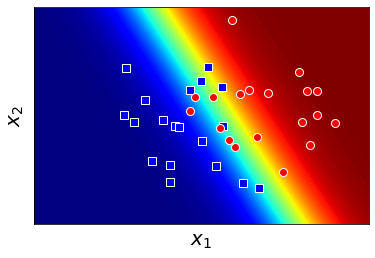

In [62]:
xm = np.arange(-1, 6, 0.025)
xlen = len(xm)
ym = np.arange(0, 4, 0.025)
ylen = len(ym)
xm, ym = np.meshgrid(xm, ym)
zm = sigmoid(w[0] + w[1]*xm + w[2]*ym)

# filename = 'logistic_2d_2.pdf'
# with PdfPages(filename) as pdf:
CS = plt.contourf(xm, ym, zm, 200, cmap='jet')

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize=8, alpha=1, markeredgecolor='w')
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize=8, alpha=1, markeredgecolor='w')
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)
# plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
# pdf.savefig(bbox_inchs='tight')
plt.show()


# Logistic Regression cho bài toán phân biệt chữ số viết tay

In [3]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

data_dir = '/AIWorkplace/MLCB/logistic regression/data' # path to your data folder
mnist = fetch_openml('mnist_784', data_home=data_dir)
N, d = mnist.data.shape
print('Total {:d} digits, each has {:d} pixels.'.format(N, d))

Total 70000 digits, each has 784 pixels.


In [25]:
X_all = mnist.data.values
y_all = mnist.target

X0 = X_all[np.where(y_all == '0')[0]]
X1 = X_all[np.where(y_all == '1')[0]]

y0 = np.zeros(X0.shape[0])
y1 = np.ones(X1.shape[0])

X = np.concatenate((X0, X1), axis=0)
y = np.concatenate((y0, y1), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2000)

In [28]:
model = LogisticRegression(C=1e5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_pred)))

Accuracy 99.85 %


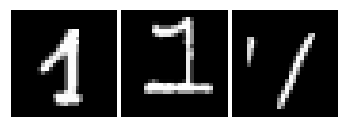

In [30]:
from display_network import *
mis = np.where((y_pred - y_test) != 0)[0]
Xmis = X_test[mis, :]

# filename = 'mnist_mis.pdf'
# with PdfPages(filename) as pdf:
plt.axis('off')
A = display_network(Xmis.T, 1, Xmis.shape[0])
f2 = plt.imshow(A, interpolation='nearest')
plt.gray()
# pdf.savefig(bbox_inches='tight')
plt.show()


# multi class

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=10000)
model = LogisticRegression(C = 1e5, max_iter=2000) # C is inverse of lam 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_pred)))

Accuracy 91.26 %


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
